# Part A

Importing Libraries

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tag import RegexpTagger
from nltk import CFG
from nltk.parse import ChartParser
from textblob import TextBlob
import spacy

import string

## Q1

In [ ]:
import nltk
nltk.download('punkt_tab')


In [ ]:
#Q1.1

# Reading text file
with open("Data_1.txt", "r", encoding="utf-8") as file:
    text = file.read()

#Regular Expression Tokenization
tokens_regex = re.findall(r'\b\w+\b', text)

#NLTK Tokenization
nltk.download('punkt_tab')
tokens_nltk = word_tokenize(text)

#TextBlob Tokenization
tokens_textblob = TextBlob(text).words

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Tokenize using spaCy
doc = nlp(text)
tokens_spacy = [token.text for token in doc]

# ✅ Print All Tokenization Results
print("\n✅ TOKENIZATION RESULTS (FULL OUTPUT):\n")
print("🔹 Regular Expression Tokens:\n", tokens_regex, "\n")
print("🔹 NLTK Tokens:\n", tokens_nltk, "\n")
print("🔹 TextBlob Tokens:\n", tokens_textblob, "\n")
print("🔹 spaCy Tokens:\n", tokens_spacy, "\n")


In [ ]:
#Q1.3


# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read the text file into a variable
with open("Data_1.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Tokenize the text
tokens = word_tokenize(text_data)

# Load English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words and punctuation
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Identify stop words in the text
found_stop_words = [word for word in tokens if word.lower() in stop_words]

# Display results
print(f"Original Tokens:\n{tokens}\n")
print(f"Filtered Tokens (Stop Words & Punctuation Removed):\n{filtered_tokens}\n")
print(f"Stop Words Found in Corpus:\n{found_stop_words}\n")


## Q2

In [ ]:
#Q2.2

# Regular Expression
steming_regex = [re.sub(r'(ing|ed|s)$', '', word) for word in tokens_nltk]

#Porter Stemmer
porter = PorterStemmer()
steming_porter = [porter.stem(word) for word in tokens_nltk]

# Lancaster Stemmer
lancaster = LancasterStemmer()
steming_lancaster = [lancaster.stem(word) for word in tokens_nltk]

print("Results:")
print(f"Regex: {steming_regex}")
print(f"Porter: {steming_porter}")
print(f"Lancester: {steming_lancaster}")

## Q3

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


In [ ]:
#Q3.1

# Ensure the required NLTK resources are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

# Read the text file
with open("Data_2.txt", "r", encoding="utf-8") as file2:
    text2 = file2.read()

# Tokenize the text
tokens = word_tokenize(text2)

# ✅ 1. NLTK POS Tagger
pos_tags_nltk = nltk.pos_tag(tokens)

# ✅ 2. TextBlob POS Tagger
blob = TextBlob(text2)
pos_tags_blob = blob.tags

# ✅ 3. Regular Expression (Regex) POS Tagger
patterns = [
    (r'.*ing$', 'VBG'),  # Gerund/Present Participle
    (r'.*ed$', 'VBD'),   # Past Tense Verb
    (r'.*es$', 'VBZ'),   # Third Person Singular Verb
    (r'.*s$', 'NNS'),    # Plural Noun
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # Numbers
    (r'.*ly$', 'RB'),    # Adverbs
    (r'.*', 'NN')        # Default case -> Noun
]

regex_tagger = RegexpTagger(patterns)
pos_tags_regex = regex_tagger.tag(tokens)

# ✅ Print Results
print("✅ POS Tagging Results:\n")
print("🔹 NLTK POS Tags:\n", pos_tags_nltk, "\n")
print("🔹 TextBlob POS Tags:\n", pos_tags_blob, "\n")
print("🔹 Regex POS Tags:\n", pos_tags_regex, "\n")


In [ ]:
# Read input sentence from Data_2.txt
with open("Data_2.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Tokenize the sentence (removes punctuation)
tokens = nltk.word_tokenize(text)
tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation

# Define the corrected grammar
grammar = CFG.fromstring("""
S -> NP VP
NP -> DT JJ JJ NN | DT JJ NN | DT NN | NP CC NP
VP -> VBD PP | VBD Adv | VBD NP | VP CC VP
PP -> IN NP
DT -> 'The' | 'the' | 'A' | 'a'
JJ -> 'big' | 'black' | 'white' | 'small' | 'quick'
NN -> 'dog' | 'cat' | 'fox' | 'rabbit'
VBD -> 'barked' | 'chased' | 'jumped' | 'ran'
IN -> 'at' | 'on' | 'over' | 'under'
CC -> 'and' | 'or'
Adv -> 'away' | 'quickly' | 'silently'
""")

# Initialize parser
parser = ChartParser(grammar)

# Generate parse trees
print("Parse Trees:")
for tree in parser.parse(tokens):
    print(tree)
    tree.draw()


# PART B

Importing Libraries

In [97]:
# Install necessary libraries (if not already installed)
# !pip install pandas numpy matplotlib seaborn nltk wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Download NLTK data (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Jet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Q1 Dataset and EDA

### Loading the dataset

In [98]:
# Load dataset with correct encoding
file_path = "McDonald_s_Reviews.csv" 
df = pd.read_csv(file_path, encoding="ISO-8859-1")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


### Shape of the Data

In [99]:
df.shape

(33396, 10)

### Features of Dataset

In [100]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


### Dataset Summary

In [101]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


### Check for Null Values

In [102]:
# Check Null Values
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

### Check for Duplicates

In [103]:
duplicates = df.duplicated(subset=['review']).sum()
print(f"Number of duplicate reviews: {duplicates}")


Number of duplicate reviews: 11111


### Explore Random Samples for Potential Issues

In [104]:
# Inspect random reviews
for review in df['review'].sample(10, random_state=42):
    print("-", review)


- Somehow they forgot to give us our order...no big deal I needed the exercise and they did apologize
- Neutral
- Drive thru a little slow but friendly people and food on par
- Normal McDonald's not much else to say
- Good service
- I went through the drive-through and ordered a double Mac meal. I received a single Mac meal And the food was cold. I drove away and call back and told  Them  my meal was wrong. The manager tells me on my next visit I will receive a complimentary order. NO how about giving me the right order or given me my money back. I gave this McDonald's the benefit of Benefit of the doubt is not my 1st Bad Experience in this McDonald's. But it will be my last as I will never visit this McDonald's again.
- Stopped in here on January 24th 2018 and ordered at the counter, a signature classic grilled signature sriacha chicken sandwich with an artisan bun. Paid for my order and waited. When my order was ready it was handed to me in a bag.I asked for ketchup and proceeded to 

### Data Visualization

#### Distribution of Ratings

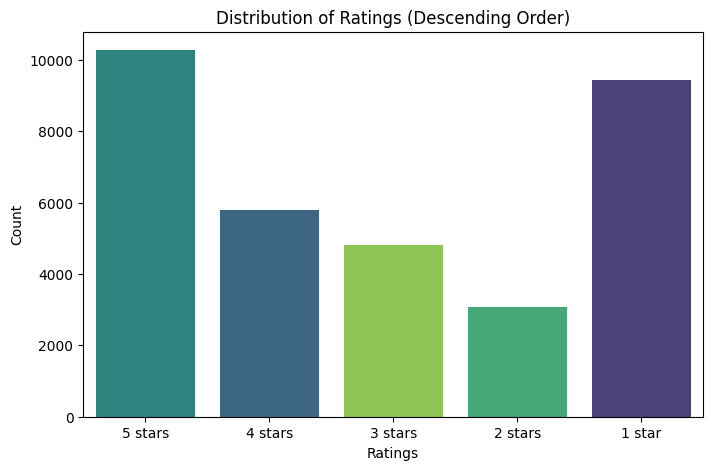

In [105]:
plt.figure(figsize=(8,5))

# Sort ratings in descending order
rating_order = df["rating"].value_counts().sort_index(ascending=False).index

# Assign the x variable to both 'x' and 'hue', and use 'legend=False'
sns.countplot(
    data=df, 
    x="rating", 
    hue="rating", 
    order=rating_order, 
    palette="viridis", 
    legend=False
)

plt.title("Distribution of Ratings (Descending Order)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


#### Top Locations with Most Reviews

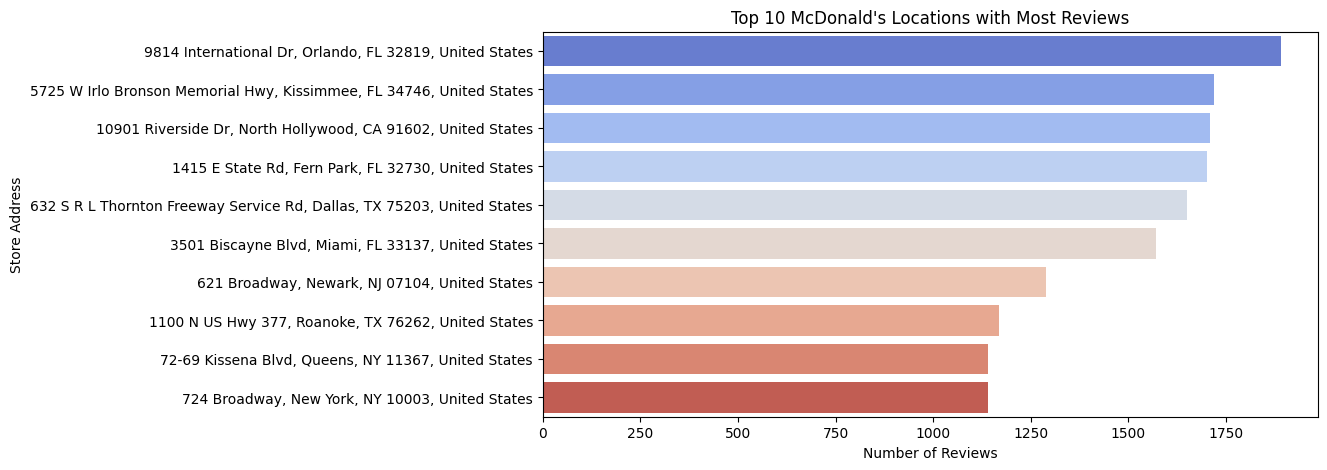

In [106]:
plt.figure(figsize=(10, 5))

# Get the top 10 locations with most reviews as a Series
top_stores = df["store_address"].value_counts().head(10)

# Convert the Series into a DataFrame
df_top_stores = top_stores.reset_index()
df_top_stores.columns = ['store_address', 'review_count']

# Plot using barplot with hue set to 'store_address' and legend disabled
sns.barplot(x='review_count', 
            y='store_address', 
            data=df_top_stores, 
            hue='store_address', 
            palette="coolwarm", 
            legend=False)

plt.title("Top 10 McDonald's Locations with Most Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Store Address")
plt.show()


#### Relationship Between Ratings & Review Length

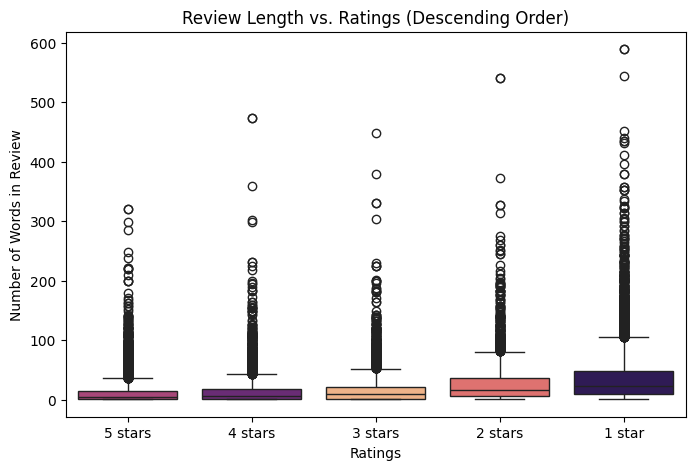

In [107]:
plt.figure(figsize=(8, 5))

# Add a new column for review length
df["Review_Length"] = df["review"].apply(lambda x: len(str(x).split()))

# Plot the boxplot with 'rating' as both x and hue
sns.boxplot(
    data=df,
    x="rating",
    y="Review_Length",
    hue="rating",
    order=rating_order,
    palette="magma",
    legend=False
)

plt.title("Review Length vs. Ratings (Descending Order)")
plt.xlabel("Ratings")
plt.ylabel("Number of Words in Review")
plt.show()


#### Word Frequency in Reviews

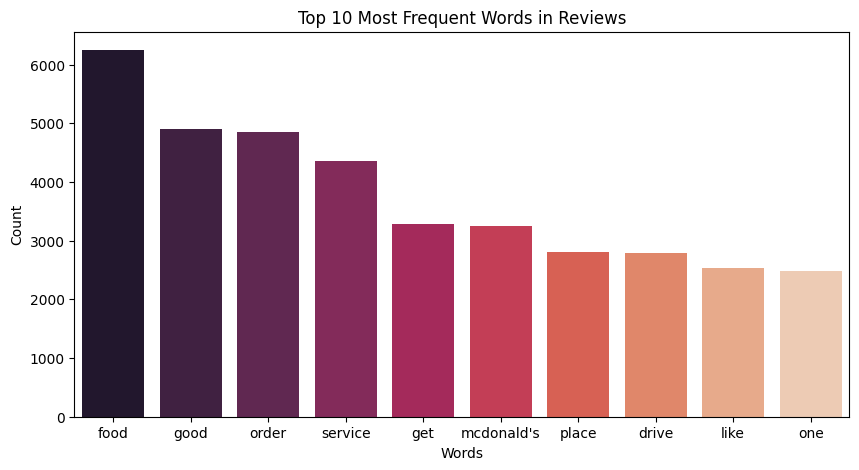

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

# Tokenize & remove stop words
stop_words = set(stopwords.words("english"))
all_words = " ".join(df["review"]).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)
top_words_list = word_counts.most_common(10)

# Convert to DataFrame for plotting
df_top_words = pd.DataFrame(top_words_list, columns=["word", "count"])

# Plot most common words with hue set to 'word'
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_top_words, 
    x="word", 
    y="count", 
    hue="word", 
    palette="rocket", 
    legend=False
)
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


#### Word Cloud

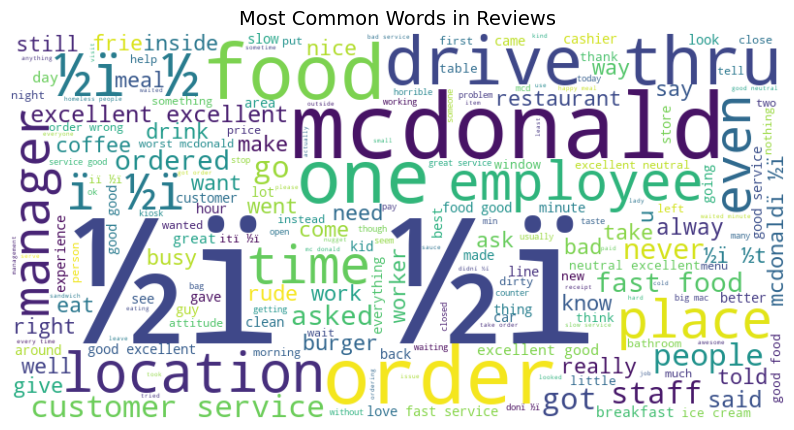

In [109]:
# Define stop words
stop_words = set(stopwords.words("english"))

# Combine all reviews into one text
all_text = " ".join(df["review"]).lower()

# Remove stop words
filtered_text = " ".join([word for word in all_text.split() if word not in stop_words])

# Generate Word Cloud
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews", fontsize=14)
plt.show()


## Data Preprocessing

### Handle Duplicates

In [110]:
print(f"Dataset size before removing duplicates: {df.shape}")
df = df.drop_duplicates(subset=['review'], keep='first')
print(f"Dataset size after removing duplicates: {df.shape}")


Dataset size before removing duplicates: (33396, 11)
Dataset size after removing duplicates: (22285, 11)


### Data Type Conversion

In [111]:
# Ensure 'rating' is numeric
print('Before: ', df['rating'].dtype)
df['rating'] = df['rating'].astype(str).str.extract(r'(\d+)')[0].astype(int)
print('After: ', df['rating'].dtype)
df['rating']

Before:  object
After:  int64


0        1
1        4
2        1
3        5
4        1
        ..
33391    1
33392    5
33393    4
33394    5
33395    5
Name: rating, Length: 22285, dtype: int64

### Feature Engineering

In [112]:
# Function to map ratings to sentiment labels
def map_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

# Apply sentiment mapping permanently to df
df["sentiment"] = df["rating"].apply(map_sentiment)

df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,Review_Length,sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,51,Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,42,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,70,Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,13,Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,68,Negative


### Visualization of New Feature

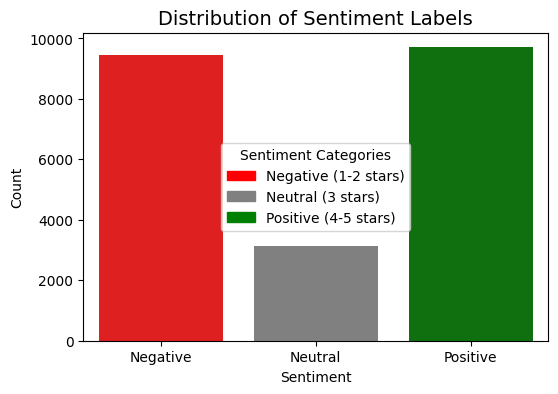

In [113]:
import matplotlib.patches as mpatches
# Define the sentiment order you want on the x-axis
category_order = ["Negative", "Neutral", "Positive"]

# Create a dictionary mapping each sentiment to a color
palette_dict = {
    "Negative": "red",
    "Neutral": "gray",
    "Positive": "green"
}

plt.figure(figsize=(6, 4))

# Plot the countplot with both x and hue set to 'sentiment'
ax = sns.countplot(
    x="sentiment",
    hue="sentiment",
    data=df,
    order=category_order,       
    hue_order=category_order,   
    palette=palette_dict,
    legend=False                
)

# Manually build a legend with colored patches
negative_patch = mpatches.Patch(color="red",   label="Negative (1-2 stars)")
neutral_patch  = mpatches.Patch(color="gray",  label="Neutral (3 stars)")
positive_patch = mpatches.Patch(color="green", label="Positive (4-5 stars)")

plt.legend(
    handles=[negative_patch, neutral_patch, positive_patch],
    title="Sentiment Categories",
    loc="center"
)

plt.title("Distribution of Sentiment Labels", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Remove Emojis, Special Characters, and Punctuation

In [114]:
def remove_emojis_special(text):
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove emojis/non-ascii chars
    text = re.sub(r'[^\w\s]', '', text)        # remove punctuation/special chars
    return text.lower()

df['cleaned_review'] = df['review'].apply(remove_emojis_special)
df[['review', 'cleaned_review']].head()



,review,cleaned_review
0,Why does it look like someone spit on my food?...,why does it look like someone spit on my food\...
1,It'd McDonalds. It is what it is as far as the...,itd mcdonalds it is what it is as far as the f...
2,Made a mobile order got to the speaker and che...,made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,my mc crispy chicken sandwich was customer se...
4,"I repeat my order 3 times in the drive thru, a...",i repeat my order 3 times in the drive thru an...


### Tokenization

In [115]:
df['tokens'] = df['cleaned_review'].apply(word_tokenize)
df[['cleaned_review', 'tokens']].head()

,cleaned_review,tokens
0,why does it look like someone spit on my food\...,"[why, does, it, look, like, someone, spit, on,..."
1,itd mcdonalds it is what it is as far as the f...,"[itd, mcdonalds, it, is, what, it, is, as, far..."
2,made a mobile order got to the speaker and che...,"[made, a, mobile, order, got, to, the, speaker..."
3,my mc crispy chicken sandwich was customer se...,"[my, mc, crispy, chicken, sandwich, was, custo..."
4,i repeat my order 3 times in the drive thru an...,"[i, repeat, my, order, 3, times, in, the, driv..."


### Removing Stopwords

In [116]:
from nltk.corpus import stopwords

# Get the default stopwords
stop_words = set(stopwords.words('english'))

# Remove 'not' and any other negation words you want to keep
negation_words = {'not', 'no', 'nor', 'never', 'none'}
stop_words = stop_words.difference(negation_words)

# Then apply the filtering
df['tokens'] = df['tokens'].apply(
    lambda words: [w for w in words if w not in stop_words]
)

df['tokens'].head()

0    [look, like, someone, spit, food, normal, tran...
1    [itd, mcdonalds, far, food, atmosphere, go, st...
2    [made, mobile, order, got, speaker, checked, l...
3    [mc, crispy, chicken, sandwich, customer, serv...
4    [repeat, order, 3, times, drive, thru, still, ...
Name: tokens, dtype: object

In [117]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,Review_Length,sentiment,cleaned_review,tokens
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,51,Negative,why does it look like someone spit on my food\...,"[look, like, someone, spit, food, normal, tran..."
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,42,Positive,itd mcdonalds it is what it is as far as the f...,"[itd, mcdonalds, far, food, atmosphere, go, st..."
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,70,Negative,made a mobile order got to the speaker and che...,"[made, mobile, order, got, speaker, checked, l..."
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,13,Positive,my mc crispy chicken sandwich was customer se...,"[mc, crispy, chicken, sandwich, customer, serv..."
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,68,Negative,i repeat my order 3 times in the drive thru an...,"[repeat, order, 3, times, drive, thru, still, ..."


### Spell Check

### Lemmatization

In [118]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def text_lemmatization(inputs):
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


# Perform lemmatization
df['LemmatizedText'] = df['tokens'].apply(text_lemmatization)
df['LemmatizedText'].head()

0    [look, like, someone, spit, food, normal, tran...
1    [itd, mcdonalds, far, food, atmosphere, go, st...
2    [make, mobile, order, get, speaker, check, lin...
3    [mc, crispy, chicken, sandwich, customer, serv...
4    [repeat, order, 3, time, drive, thru, still, m...
Name: LemmatizedText, dtype: object

### Concatenation of Reviews to String

In [119]:
# Concatenate tokens into a single string
df['final_text'] = df['LemmatizedText'].str.join(' ')
df['final_text'].head()

0    look like someone spit food normal transaction...
1    itd mcdonalds far food atmosphere go staff mak...
2    make mobile order get speaker check line not m...
3    mc crispy chicken sandwich customer service qu...
4    repeat order 3 time drive thru still manage me...
Name: final_text, dtype: object

### Feature Selection

In [123]:
# Specify columns to KEEP
columns_to_keep = ['store_address', 'rating_count', 'rating', 'review', 'sentiment', 'final_text']

# Filter and keep only the columns that exist in the DataFrame
existing_columns = [col for col in columns_to_keep if col in df.columns]

# Select only these columns
df = df[existing_columns]

# Display updated dataset info
print("✅ Updated DataFrame Columns:")
print(df.info())
df.head()


✅ Updated DataFrame Columns:
<class 'pandas.core.frame.DataFrame'>
Index: 22285 entries, 0 to 33395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   store_address  22285 non-null  object
 1   rating_count   22285 non-null  object
 2   rating         22285 non-null  int64 
 3   review         22285 non-null  object
 4   sentiment      22285 non-null  object
 5   final_text     22285 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


,store_address,rating_count,rating,review,sentiment,final_text
0,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Why does it look like someone spit on my food?...,Negative,look like someone spit food normal transaction...
1,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",4,It'd McDonalds. It is what it is as far as the...,Positive,itd mcdonalds far food atmosphere go staff mak...
2,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Made a mobile order got to the speaker and che...,Negative,make mobile order get speaker check line not m...
3,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",5,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Positive,mc crispy chicken sandwich customer service qu...
4,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,"I repeat my order 3 times in the drive thru, a...",Negative,repeat order 3 time drive thru still manage me...


## Post-preprocessing EDA

### Shape of the Data

In [125]:
df.shape

(22285, 6)

### Dataset Features

In [126]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22285 entries, 0 to 33395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   store_address  22285 non-null  object
 1   rating_count   22285 non-null  object
 2   rating         22285 non-null  int64 
 3   review         22285 non-null  object
 4   sentiment      22285 non-null  object
 5   final_text     22285 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


### Dataset Summary

In [127]:
df.head()

,store_address,rating_count,rating,review,sentiment,final_text
0,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Why does it look like someone spit on my food?...,Negative,look like someone spit food normal transaction...
1,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",4,It'd McDonalds. It is what it is as far as the...,Positive,itd mcdonalds far food atmosphere go staff mak...
2,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Made a mobile order got to the speaker and che...,Negative,make mobile order get speaker check line not m...
3,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",5,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Positive,mc crispy chicken sandwich customer service qu...
4,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,"I repeat my order 3 times in the drive thru, a...",Negative,repeat order 3 time drive thru still manage me...


### Word Cloud

#### General Word Cloud

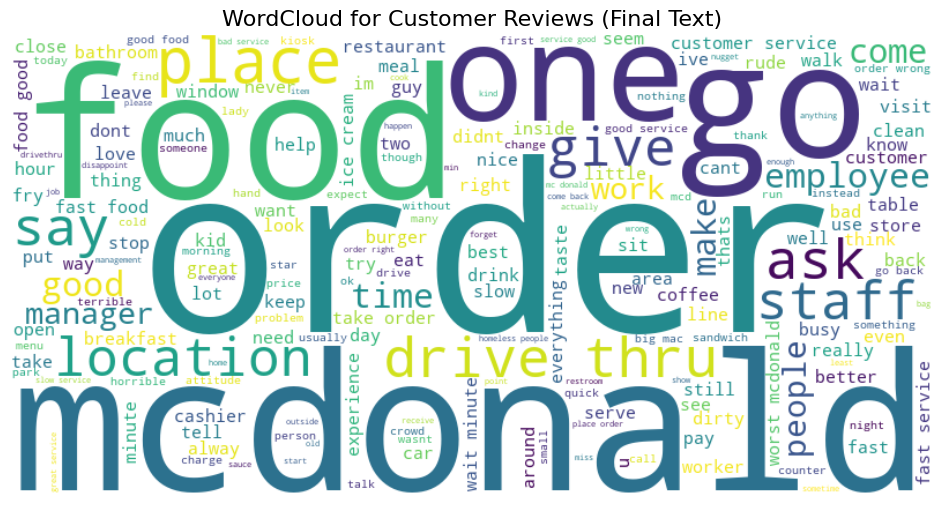

In [128]:
# Generate WordCloud directly from the 'final_text' column
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(df['final_text']))

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Customer Reviews (Final Text)', fontsize=16)
plt.show()


#### Word Cloud for Different Sentiment

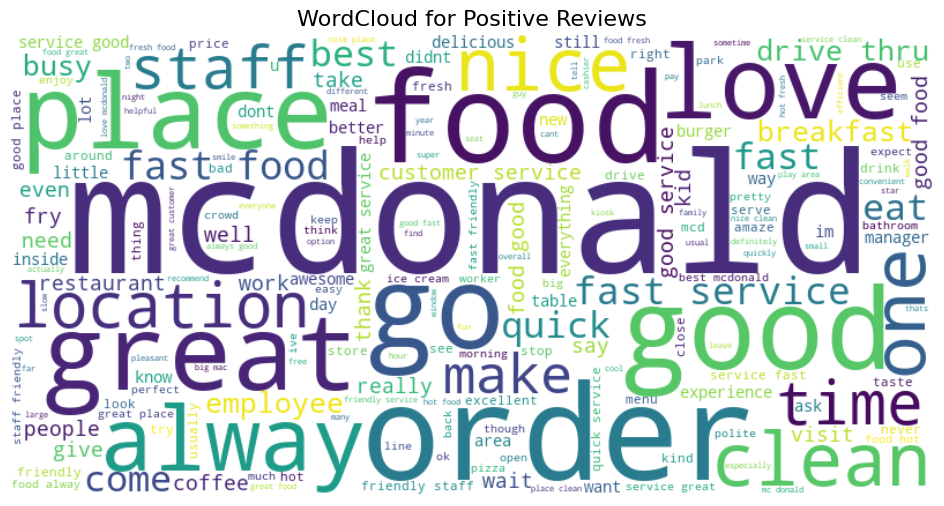

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [145]:
# Sentiment categories
sentiments = ['Positive', 'Neutral', 'Negative']

# Plot WordCloud for each sentiment
for sentiment in sentiments:
    # Join text reviews for the specific sentiment
    sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['final_text'])
    
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(sentiment_text)
    
    # Plot the WordCloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Reviews', fontsize=16)
    plt.show()


## Steps to Expand Dataset and Split Data for Sentiment Classification

## Ensure Neutral Sentiment is Removed

In [144]:
# Remove Neutral sentiment
df = df[df['sentiment'] != 'Neutral']

# Check sentiment distribution
print(df['sentiment'].value_counts(normalize=True))  # Should show only Positive & Negative


sentiment
Positive    0.506869
Negative    0.493131
Name: proportion, dtype: float64


## Apply Data Augmentation

### Synonym Replacement (Word Substitution)

In [147]:
from nltk.corpus import wordnet
import random

# Function to replace words with synonyms
def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words.copy()
    
    for _ in range(n):
        if not words:  # Ensure text is not empty
            return text
        
        word_idx = random.randint(0, len(words) - 1)  # Select random word
        synonyms = wordnet.synsets(words[word_idx])  # Get synonyms
        
        if synonyms:  # Only replace if synonyms exist
            synonym = synonyms[0].lemmas()[0].name()  # Pick first synonym
            new_words[word_idx] = synonym
    
    return ' '.join(new_words)

# Apply function with safety checks
df['augmented_text'] = df['final_text'].apply(lambda x: synonym_replacement(str(x)))  # Convert to string


### Back-Translation (Using Google Translate API)

In [175]:
import time

# Function to apply back-translation in batches (1000 rows per batch)
def batch_translate(df, batch_size=100, lang='es'):
    translated_texts = []  # Store translated texts
    total_batches = len(df) // batch_size + (1 if len(df) % batch_size != 0 else 0)

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]  # Extract batch
        print(f"🔹 Processing batch {i//batch_size + 1}/{total_batches}...")

        # Translate each row in the batch
        batch_translated = batch['final_text'].apply(lambda x: back_translate(str(x), lang))
        translated_texts.extend(batch_translated)

        time.sleep(3)  # Shorter delay to balance speed and avoid API blocking

    return translated_texts

# Apply batched back-translation with 1000 rows per batch
df['back_translated_text'] = batch_translate(df, batch_size=100, lang='es')


🔹 Processing batch 1/383...
🔹 Processing batch 2/383...
🔹 Processing batch 3/383...
🔹 Processing batch 4/383...
🔹 Processing batch 5/383...
🔹 Processing batch 6/383...
🔹 Processing batch 7/383...
🔹 Processing batch 8/383...
🔹 Processing batch 9/383...
🔹 Processing batch 10/383...
🔹 Processing batch 11/383...
🔹 Processing batch 12/383...
🔹 Processing batch 13/383...
🔹 Processing batch 14/383...
🔹 Processing batch 15/383...
🔹 Processing batch 16/383...
🔹 Processing batch 17/383...
🔹 Processing batch 18/383...
🔹 Processing batch 19/383...
🔹 Processing batch 20/383...
🔹 Processing batch 21/383...
🔹 Processing batch 22/383...
🔹 Processing batch 23/383...
🔹 Processing batch 24/383...
🔹 Processing batch 25/383...
🔹 Processing batch 26/383...
🔹 Processing batch 27/383...
🔹 Processing batch 28/383...
🔹 Processing batch 29/383...
🔹 Processing batch 30/383...
Translation failed for: small mcdonalds like 3 table i... | Error: Pequeños McDonalds como 3 mesa dentro de 2 afuera. Haga una locura a la 

### Random Word Insertion (Adding Extra Words)

In [176]:
import random

# Define extra words for insertion
extra_words = ['very', 'extremely', 'absolutely', 'highly', 'definitely', 'truly']

# Function to randomly insert words into text
def random_insertion(text, n=2):
    words = text.split()
    
    # Ensure text is not empty before inserting words
    if len(words) == 0:
        return text  

    for _ in range(n):
        random_idx = random.randint(0, len(words)-1)
        words.insert(random_idx, random.choice(extra_words))

    return ' '.join(words)

# Apply the function to generate extended text
df['extended_text'] = df['final_text'].apply(lambda x: random_insertion(str(x)))

# Preview the changes
df[['final_text', 'extended_text']].head(10)


,final_text,extended_text
0,look like someone spit food normal transaction...,truly look like someone spit food normal trans...
1,itd mcdonalds far food atmosphere go staff mak...,very itd highly mcdonalds far food atmosphere ...
2,make mobile order get speaker check line not m...,make definitely mobile order absolutely get sp...
3,mc crispy chicken sandwich customer service qu...,very mc crispy chicken sandwich extremely cust...
4,repeat order 3 time drive thru still manage me...,repeat order 3 time drive thru still highly ma...
5,work door dash lock us wait long line no reaso...,work door dash lock us wait long line no reaso...
6,could give location zero customer service woul...,could give location zero customer service woul...
7,come order large coffee wno ice hand cup less ...,come order large coffee wno absolutely ice han...
8,go thru drive thru order get home notice 10 pi...,go thru drive thru order get home notice 10 tr...
9,im not really huge fan fast food 2 teenage dau...,im not really huge fan fast food 2 teenage dau...


### Duplicate Existing Data With Minor Changes

In [177]:
# Create a copy of the original dataframe for augmentation
df_augmented = df.copy()

# Apply emphasis by adding "!!!" to the final text column
df_augmented['final_text'] = df_augmented['final_text'].apply(lambda x: str(x) + " !!!")

# Concatenate the original and augmented data
df = pd.concat([df, df_augmented], ignore_index=True)

# Display the new dataset size
print(f"🔹 Dataset size after augmentation: {df.shape[0]} rows")

# Preview the first few samples
df[['final_text']].head(10)


🔹 Dataset size after augmentation: 76580 rows


,final_text
0,look like someone spit food normal transaction...
1,itd mcdonalds far food atmosphere go staff mak...
2,make mobile order get speaker check line not m...
3,mc crispy chicken sandwich customer service qu...
4,repeat order 3 time drive thru still manage me...
5,work door dash lock us wait long line no reaso...
6,could give location zero customer service woul...
7,come order large coffee wno ice hand cup less ...
8,go thru drive thru order get home notice 10 pi...
9,im not really huge fan fast food 2 teenage dau...


### Merge All Augmented Data

In [178]:
df['final_expanded_text'] = df['final_text'] + " " + df['augmented_text'] + " " + df['back_translated_text'] + " " + df['extended_text']


# Split Data Into Training and Testing

In [179]:
from sklearn.model_selection import train_test_split

# Define features (expanded text) and target (sentiment labels)
X = df['final_expanded_text']  
y = df['sentiment']  

# Perform train-test split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check dataset size after augmentation
print(f"🔹 Training Set Size: {len(X_train)}")
print(f"🔹 Testing Set Size: {len(X_test)}")
print(y_train.value_counts())
print(y_test.value_counts())


🔹 Training Set Size: 61264
🔹 Testing Set Size: 15316
sentiment
Positive    31053
Negative    30211
Name: count, dtype: int64
sentiment
Positive    7763
Negative    7553
Name: count, dtype: int64


# Convert Text into TF-IDF Features

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

# Apply TF-IDF transformation
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit on training data
X_test_tfidf = vectorizer.transform(X_test)  # Transform test data

# Print shape to verify transformation
print("🔹 TF-IDF Training Data Shape:", X_train_tfidf.shape)
print("🔹 TF-IDF Testing Data Shape:", X_test_tfidf.shape)


🔹 TF-IDF Training Data Shape: (61264, 5000)
🔹 TF-IDF Testing Data Shape: (15316, 5000)


#  Step 6: Train & Evaluate Models Again

## Train & Evaluate Naïve Bayes

In [181]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate Naïve Bayes
print("🔹 Naïve Bayes Performance on Augmented Data")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")


🔹 Naïve Bayes Performance on Augmented Data
              precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      7553
    Positive       0.90      0.88      0.89      7763

    accuracy                           0.89     15316
   macro avg       0.89      0.89      0.89     15316
weighted avg       0.89      0.89      0.89     15316

Accuracy: 0.8883


## Train & Evaluate Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("🔹 Logistic Regression Performance on Augmented Data")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")


🔹 Logistic Regression Performance on Augmented Data
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      7553
    Positive       0.91      0.91      0.91      7763

    accuracy                           0.91     15316
   macro avg       0.91      0.91      0.91     15316
weighted avg       0.91      0.91      0.91     15316

Accuracy: 0.9137


## Train & Evaluate SVM

In [183]:
from sklearn.svm import SVC

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate SVM
print("🔹 SVM Performance on Augmented Data")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


🔹 SVM Performance on Augmented Data
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92      7553
    Positive       0.92      0.93      0.93      7763

    accuracy                           0.92     15316
   macro avg       0.92      0.92      0.92     15316
weighted avg       0.92      0.92      0.92     15316

Accuracy: 0.9242


## Compare Model Performance

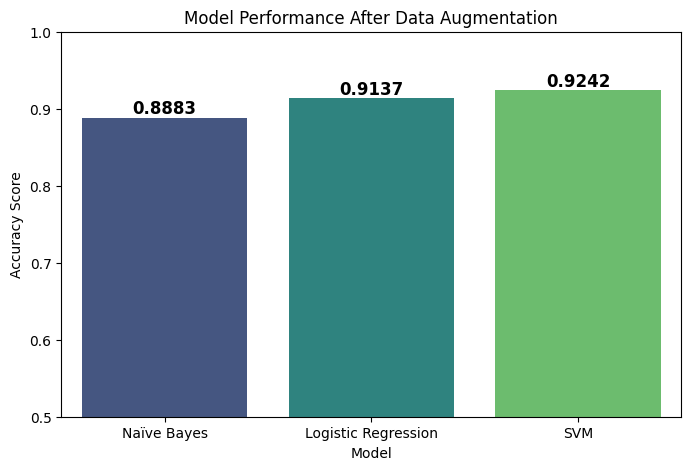

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Store accuracy results
accuracy_scores = {
    "Naïve Bayes": accuracy_score(y_test, y_pred_nb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Convert results into DataFrame for easy comparison
accuracy_df = pd.DataFrame(accuracy_scores.items(), columns=["Model", "Accuracy"])

# Plot accuracy scores
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Model", y="Accuracy", data=accuracy_df, hue="Model", palette="viridis", legend=False)

# Add accuracy values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Titles and labels
plt.title("Model Performance After Data Augmentation")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.ylim(0.5, 1)  # Set limit to make sure values fit

# Show the plot
plt.show()


## Hyperparameter Tuning

In [157]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np


## Hyperparameter Tuning for Naïve Bayes

In [187]:
from sklearn.naive_bayes import MultinomialNB

# Define parameter grid for Naïve Bayes
nb_params = {'alpha': [0.1, 0.5, 1, 1.5, 2]}  # Test different smoothing values

# Perform Grid Search
nb_grid_search = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
nb_grid_search.fit(X_train_tfidf, y_train)

# Print best parameters and accuracy
print("🔹 Best Naïve Bayes Parameters:", nb_grid_search.best_params_)
print("🔹 Best Naïve Bayes Accuracy:", nb_grid_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
🔹 Best Naïve Bayes Parameters: {'alpha': 0.1}
🔹 Best Naïve Bayes Accuracy: 0.8913227590708562


## Hyperparameter Tuning for Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
lr_params = {
    'C': [0.1, 0.5, 1, 5, 10],  # Different levels of regularization
    'solver': ['liblinear', 'lbfgs', 'saga']  # Different solvers
}

# Perform Grid Search
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train_tfidf, y_train)

# Print best parameters and accuracy
print("🔹 Best Logistic Regression Parameters:", lr_grid_search.best_params_)
print("🔹 Best Logistic Regression Accuracy:", lr_grid_search.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
🔹 Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}
🔹 Best Logistic Regression Accuracy: 0.9295507820894116


## Hyperparameter Tuning for SVM

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10, 100],  # Regularization values
    'kernel': ['linear', 'rbf', 'poly']  # Testing different kernels
}

# Perform Grid Search
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train_tfidf, y_train)

# Print best parameters and accuracy
print("🔹 Best SVM Parameters:", svm_grid_search.best_params_)
print("🔹 Best SVM Accuracy:", svm_grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔹 Best SVM Parameters: {'C': 100, 'kernel': 'rbf'}
🔹 Best SVM Accuracy: 0.9848687425593056


## Compare the Models After Tuning

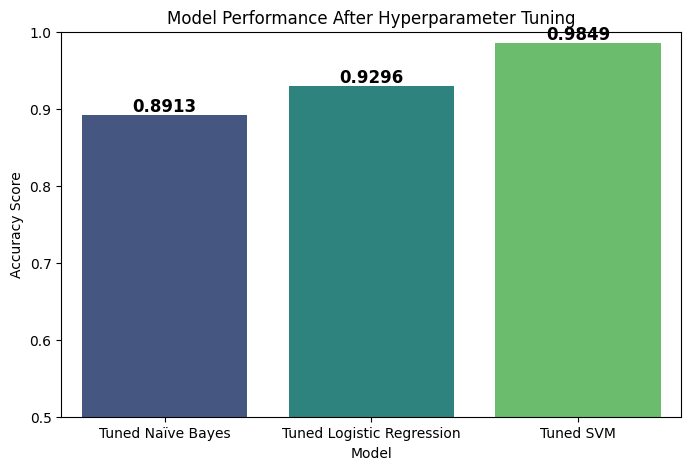

In [188]:
# Store accuracy results after tuning
accuracy_scores = {
    "Tuned Naïve Bayes": nb_grid_search.best_score_,
    "Tuned Logistic Regression": lr_grid_search.best_score_,
    "Tuned SVM": svm_grid_search.best_score_
}

# Convert results into DataFrame
accuracy_df = pd.DataFrame(accuracy_scores.items(), columns=["Model", "Accuracy"])

# Plot accuracy scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Model", y="Accuracy", data=accuracy_df, hue="Model", palette="viridis", legend=False)

# Add accuracy values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Titles and labels
plt.title("Model Performance After Hyperparameter Tuning")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.ylim(0.5, 1)  # Set limit to ensure visualization is clear

# Show the plot
plt.show()


# Train & Evaluate Sentiment Classification Models (Before Data Augmentation)

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Import Naïve Bayes model

# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate Naïve Bayes
from sklearn.metrics import accuracy_score, classification_report

print("🔹 Multinomial Naïve Bayes Performance")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")


🔹 Multinomial Naïve Bayes Performance
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      1888
    Positive       0.89      0.86      0.87      1941

    accuracy                           0.87      3829
   macro avg       0.87      0.87      0.87      3829
weighted avg       0.87      0.87      0.87      3829

Accuracy: 0.8733


## Train & Evaluate Logistic Regression

In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("🔹 Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")


🔹 Logistic Regression Performance
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.87      1888
    Positive       0.88      0.87      0.88      1941

    accuracy                           0.88      3829
   macro avg       0.88      0.88      0.88      3829
weighted avg       0.88      0.88      0.88      3829

Accuracy: 0.8754


## Train & Evaluate Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC  # Import Support Vector Machine

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate SVM
from sklearn.metrics import accuracy_score, classification_report

print("🔹 Support Vector Machine (SVM) Performance")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


🔹 Support Vector Machine (SVM) Performance
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.87      1888
    Positive       0.88      0.88      0.88      1941

    accuracy                           0.88      3829
   macro avg       0.88      0.88      0.88      3829
weighted avg       0.88      0.88      0.88      3829

Accuracy: 0.8765
